Text(0.5, 1.0, 't10 vs time')

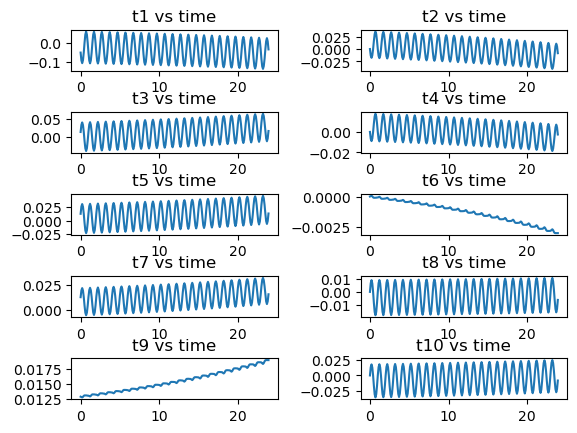

In [1]:
## Code for Final Exam Problem 3
## Inverse Kinematics of the snake robot

from sympy import *
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D
import numpy as np

theta_1 = symbols("theta_1")   
theta_2 = symbols("theta_2")   
theta_3 = symbols("theta_3")   
theta_4 = symbols("theta_4")   
theta_5 = symbols("theta_5")   
theta_6 = symbols("theta_6") 
theta_7 = symbols("theta_7")   
theta_8 = symbols("theta_8")   
theta_9 = symbols("theta_9") 
theta_10 = symbols("theta_10") 

t01 = Matrix([[cos(theta_1),0,-sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,cos(theta_1),0.1*sin(theta_1)],[0,-1,0,0],[0,0,0,1]])
t12 = Matrix([[cos(theta_1),0,sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,-cos(theta_1),0.1*sin(theta_1)],[0,1,0,0],[0,0,0,1]])
t23 = Matrix([[cos(theta_1),0,-sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,cos(theta_1),0.1*sin(theta_1)],[0,-1,0,0],[0,0,0,1]])
t34 = Matrix([[cos(theta_1),0,sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,-cos(theta_1),0.1*sin(theta_1)],[0,1,0,0],[0,0,0,1]])
t45 = Matrix([[cos(theta_1),0,-sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,cos(theta_1),0.1*sin(theta_1)],[0,-1,0,0],[0,0,0,1]])
t56 = Matrix([[cos(theta_1),0,sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,-cos(theta_1),0.1*sin(theta_1)],[0,1,0,0],[0,0,0,1]])
t67 = Matrix([[cos(theta_1),0,-sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,cos(theta_1),0.1*sin(theta_1)],[0,-1,0,0],[0,0,0,1]])
t78 = Matrix([[cos(theta_1),0,sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,-cos(theta_1),0.1*sin(theta_1)],[0,1,0,0],[0,0,0,1]])
t89 = Matrix([[cos(theta_1),0,-sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,cos(theta_1),0.1*sin(theta_1)],[0,-1,0,0],[0,0,0,1]])
t910 = Matrix([[cos(theta_1),0,sin(theta_1),0.1*cos(theta_1)],[sin(theta_1),0,-cos(theta_1),0.1*sin(theta_1)],[0,1,0,0],[0,0,0,1]])


T1=t01
T2=t01*t12
T3=t01*t12*t23
T4=t01*t12*t23*t34
T5=t01*t12*t23*t34*t45
T6=t01*t12*t23*t34*t45*t56
T7=t01*t12*t23*t34*t45*t56*t67
T8=t01*t12*t23*t34*t45*t56*t67*t78
T9=t01*t12*t23*t34*t45*t56*t67*t78*t89
T10=t01*t12*t23*t34*t45*t56*t67*t78*t89*t910

Z1=expand(T1[0:3,2])
Z2=expand(T2[0:3,2])
Z3=expand(T3[0:3,2])
Z4=expand(T4[0:3,2])
Z5=expand(T5[0:3,2])
Z6=expand(T6[0:3,2])
Z7=expand(T7[0:3,2])
Z8=expand(T8[0:3,2])
Z9=expand(T9[0:3,2])
Z10=expand(T10[0:3,2])

P=expand(T10[0:3,3])

p1=expand(diff(P,theta_1))
p2=expand(diff(P,theta_2))
p3=expand(diff(P,theta_3))
p4=expand(diff(P,theta_4))
p5=expand(diff(P,theta_5))
p6=expand(diff(P,theta_6))
p7=expand(diff(P,theta_7))
p8=expand(diff(P,theta_8))
p9=expand(diff(P,theta_9))
p10=expand(diff(P,theta_10))

J1=Matrix.hstack(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10)
J2=Matrix.hstack(Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10)
J3=Matrix.vstack(J1,J2)
J=expand(J3)

the1=0
the2=0
the3=0
the4=0
the5=0
the6=0
the7=0
the8=0
the9=0
the10=0

t=0
dt=0.1
xxx=[]
yyy=[]
zzz=[]
q11=[]
q22=[]
q33=[]
q44=[]
q55=[]
q66=[]
q77=[]
q88=[]
q99=[]
q1010=[]
time=[]


while t<=24:
    
    # Substituting the angle values into the Jacobian
    
    JS=J.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3)])
    
    # Computing velocity trajectory

    x_dot=0.5/8
    y_dot=0
    z_dot=(1*math.pi)*cos(2*math.pi*t)
    phi_dot=0
    theta_dot=0
    psi_dot=0

    X_dot = Matrix([[x_dot],[y_dot],[z_dot],[phi_dot],[theta_dot],[psi_dot]])

    Q_dot = JS.pinv() * X_dot
    q1_dot=Q_dot[0,0]
    q2_dot=Q_dot[1,0]
    q3_dot=Q_dot[2,0]
    q4_dot=Q_dot[3,0]
    q5_dot=Q_dot[4,0]
    q6_dot=Q_dot[5,0]
    q7_dot=Q_dot[6,0]
    q8_dot=Q_dot[7,0]
    q9_dot=Q_dot[8,0]
    q10_dot=Q_dot[9,0]

    #Computing Joint Angle 
    
    q1=the1+(q1_dot*dt)
    q2=the2+(q2_dot*dt)
    q3=the3+(q3_dot*dt)
    q4=the4+(q4_dot*dt)
    q5=the5+(q5_dot*dt)
    q6=the6+(q6_dot*dt)
    q7=the7+(q7_dot*dt)
    q8=the8+(q8_dot*dt)
    q9=the9+(q9_dot*dt)
    q10=the10+(q10_dot*dt)    
    
    
    
    ## Substituting the new joint angle values to Final transformation matrix
    
    TU=expand(T3).subs([(theta_1,q1),(theta_2,q2),(theta_3,q3),(theta_4,q4),(theta_5,q5),(theta_6,q6),(theta_7,q7),(theta_8,q8),(theta_9,q9),(theta_10,q10)])
    
    
    ## Extracting Position values of the end effector wrt base
    
    xxx.append((TU[0,3]))
    yyy.append((TU[1,3]))
    zzz.append((TU[2,3])) 
    time.append(t)
    q11.append(q1)
    q22.append(q2)
    q33.append(q3)
    q44.append(q4)
    q55.append(q5)
    q66.append(q6) 
    q77.append(q7)
    q88.append(q8)
    q99.append(q9)
    q1010.append(q10)
    
    the1=q1
    the2=q2
    the3=q3
    the4=q4
    the5=q5
    the6=q6
    the7=q7
    the8=q8
    the9=q9
    the10=q10    
    t=t+dt


# Plot of Torque vs time
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2)
plt.subplots_adjust(wspace=0.4, hspace=1)
ax1.plot(time,q11)
ax1.set_title("t1 vs time")
ax2.plot(time,q22)
ax2.set_title("t2 vs time")
ax3.plot(time,q33)
ax3.set_title("t3 vs time")
ax4.plot(time,q44)
ax4.set_title("t4 vs time")
ax5.plot(time,q55)
ax5.set_title("t5 vs time")
ax6.plot(time,q66)
ax6.set_title("t6 vs time")
ax7.plot(time,q77)
ax7.set_title("t7 vs time")
ax8.plot(time,q88)
ax8.set_title("t8 vs time")
ax9.plot(time,q99)
ax9.set_title("t9 vs time")
ax10.plot(time,q1010)
ax10.set_title("t10 vs time")
